Can you predict the strength of concrete?

1. The average strength of the concrete samples at 1, 7, 14, and 28 days of age.
2. The coefficients $\beta_{0}$, $\beta_{1}$ ... $\beta_{8}$, to use in the following formula:

$$ Concrete \ Strength = \beta_{0} \ + \ \beta_{1}*cement \ + \ \beta_{2}*slag \ + \ \beta_{3}*fly \ ash  \ + \ \beta_{4}*water \ + $$ 
$$ \beta_{5}*superplasticizer \ + \ \beta_{6}*coarse \ aggregate \ + \ \beta_{7}*fine \ aggregate \ + \ \beta_{8}*age $$

## 💾 The data
The team has already tested more than a thousand samples ([source](https://archive.ics.uci.edu/ml/datasets/concrete+compressive+strength)):

#### Compressive strength data:
- "cement" - Portland cement in kg/m3
- "slag" - Blast furnace slag in kg/m3
- "fly_ash" - Fly ash in kg/m3
- "water" - Water in liters/m3
- "superplasticizer" - Superplasticizer additive in kg/m3
- "coarse_aggregate" - Coarse aggregate (gravel) in kg/m3
- "fine_aggregate" - Fine aggregate (sand) in kg/m3
- "age" - Age of the sample in days
- "strength" - Concrete compressive strength in megapascals (MPa)

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('concrete_data.csv')

In [3]:
df.head()

,cement,slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   fly_ash           1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarse_aggregate  1030 non-null   float64
 6   fine_aggregate    1030 non-null   float64
 7   age               1030 non-null   int64  
 8   strength          1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


1. what is strength distribution ? 
2. what is minmum strength  ? 
3. what is Maximum strength  ?
4. what is the component of best strength ? 
5. what is the component of lowest strength ? 
6. what is the age samples ? 
7. what is the mean of strength of each sample of age?
8. list the strength sorted ascending 
- The 20 MPa and 25 MPa compressive strengths, on the one hand, are usually used for house slabs, driveways, footings andfootpaths.
9. list the strength between 20 MPa and 25 MPa   
What is the strength of concrete?# on GOOGLE
Usually, the compressive strength of concrete varies from 2500 psi (17 MPa) to 4000 psi (28 MPa) and higher in residential and commercial structures. Several applications also utilize strengths greater than 10,000 psi (70 MPa)
10. list the strength between 17 MPa and 28 MPa ? 
11. list the strength greater than 70 MPa ?
12. what is the features that effect on strength ?

# 1-what is strength distribution ? 

<AxesSubplot:xlabel='strength', ylabel='Density'>

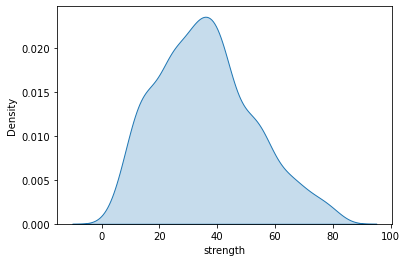

In [5]:
sns.kdeplot(x='strength',data= df , shade=True)

# 2-what is minmum strength  ?

In [6]:
df['strength'].min()

2.331807832

# 3-what is Maximum strength  ?

In [7]:
df['strength'].max()

82.5992248

4-what is the component of best strength ?

In [8]:
df.sort_values(['strength'],ascending=False).head()

,cement,slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,strength
181,389.9,189.0,0.0,145.9,22.0,944.7,755.8,91,82.599225
381,315.0,137.0,0.0,145.0,5.9,1130.0,745.0,28,81.751169
153,323.7,282.8,0.0,183.8,10.3,942.7,659.9,56,80.199848
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
159,389.9,189.0,0.0,145.9,22.0,944.7,755.8,56,79.400056


5-what is the component of lowest strength ? 

In [9]:
df.sort_values(['strength'],ascending=True).head()

,cement,slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,strength
688,108.3,162.4,0.0,203.5,0.0,938.2,849.0,3,2.331808
705,122.6,183.9,0.0,203.5,0.0,958.2,800.1,3,3.319827
652,102.0,153.0,0.0,192.0,0.0,887.0,942.0,3,4.565021
668,153.0,102.0,0.0,192.0,0.0,888.0,943.1,3,4.782206
717,141.3,212.0,0.0,203.5,0.0,971.8,748.5,3,4.827711


6-what is the age samples ?

In [10]:
df['age'].unique()

array([ 28, 270, 365, 360,  90, 180,   3,   7,  56,  91,  14, 100, 120,
         1], dtype=int64)

7-what is the mean of strength of each sample of age?

In [11]:
df.groupby('age')['strength'].mean()

age
1       9.452716
3      18.981082
7      26.050623
14     28.751038
28     36.748480
56     51.890061
90     40.480809
91     69.806938
100    47.668780
120    39.647168
180    41.730376
270    51.272511
360    40.696895
365    43.557843
Name: strength, dtype: float64

8-list the strength sorted ascending ?

In [12]:
df['strength'].sort_values()

688     2.331808
705     3.319827
652     4.565021
668     4.782206
717     4.827711
         ...    
159    79.400056
0      79.986111
153    80.199848
381    81.751169
181    82.599225
Name: strength, Length: 1030, dtype: float64

In [13]:
df[(df['strength']>20) & (df['strength']<25)]

,cement,slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,strength
87,286.30,200.9,0.00,144.70,11.20,1004.60,803.70,3,24.400556
92,337.90,189.0,0.00,174.90,9.50,944.70,755.80,3,24.097186
114,362.60,189.0,0.00,164.90,11.60,944.70,755.80,7,22.897498
185,222.36,0.0,96.67,189.29,4.46,967.08,870.32,14,24.448819
186,222.36,0.0,96.67,189.29,4.46,967.08,870.32,28,24.890084
...,...,...,...,...,...,...,...,...,...
947,299.80,0.0,119.80,211.50,9.90,878.20,727.60,28,23.835875
956,149.00,117.6,91.70,182.90,7.10,953.40,780.30,28,23.524232
967,154.80,183.4,0.00,193.30,9.10,877.20,867.70,28,23.786922
972,145.70,172.6,0.00,181.90,3.40,985.80,816.80,28,23.744174


What is the strength of concrete?# on GOOGLE
Usually, the compressive strength of concrete varies from 2500 psi (17 MPa) to 4000 psi (28 MPa) and higher in residential and commercial structures. Several applications also utilize strengths greater than 10,000 psi (70 MPa)
10-list the strength between 17 MPa and 28 MPa ? 

10-list the strength between 17 MPa and 28 MPa ? 

In [14]:
df[(df['strength']>17) & (df['strength']<28)]

,cement,slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,strength
48,237.5,237.5,0.0,228.0,0.0,932.0,594.0,7,26.258004
81,318.8,212.5,0.0,155.7,14.3,852.1,880.4,3,25.200348
87,286.3,200.9,0.0,144.7,11.2,1004.6,803.7,3,24.400556
92,337.9,189.0,0.0,174.9,9.5,944.7,755.8,3,24.097186
114,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,22.897498
...,...,...,...,...,...,...,...,...,...
989,146.5,114.6,89.3,201.9,8.8,860.0,829.5,28,19.987909
995,158.6,148.9,116.0,175.1,15.0,953.3,719.7,28,27.681082
996,152.6,238.7,0.0,200.0,6.3,1001.8,683.9,28,26.859917
1006,164.6,0.0,150.4,181.6,11.7,1023.3,728.9,28,18.033934


11- list the strength greater than 70 MPa ?

In [15]:
df[df['strength']>70]

,cement,slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,strength
0,540.0,0.0,0.0,162.0,2.50,1040.0,676.0,28,79.986111
69,485.0,0.0,0.0,146.0,0.00,1120.0,800.0,28,71.988189
129,362.6,189.0,0.0,164.9,11.60,944.7,755.8,28,71.298713
130,323.7,282.8,0.0,183.8,10.30,942.7,659.9,28,74.697830
132,362.6,189.0,0.0,164.9,11.60,944.7,755.8,28,71.298713
134,362.6,189.0,0.0,164.9,11.60,944.7,755.8,28,71.298713
136,389.9,189.0,0.0,145.9,22.00,944.7,755.8,28,74.497882
137,362.6,189.0,0.0,164.9,11.60,944.7,755.8,28,71.298713
144,475.0,118.8,0.0,181.1,8.90,852.1,781.5,56,72.298453
151,401.8,94.7,0.0,147.4,11.40,946.8,852.1,56,73.698090


12-what is the features that effect on strength ?

In [16]:
df.corr()

,cement,slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,strength
cement,1.000000,-0.275193,-0.397475,-0.081544,0.092771,-0.109356,-0.222720,0.081947,0.497833
slag,-0.275193,1.000000,-0.323569,0.107286,0.043376,-0.283998,-0.281593,-0.044246,0.134824
fly_ash,-0.397475,-0.323569,1.000000,-0.257044,0.377340,-0.009977,0.079076,-0.154370,-0.105753
water,-0.081544,0.107286,-0.257044,1.000000,-0.657464,-0.182312,-0.450635,0.277604,-0.289613
superplasticizer,0.092771,0.043376,0.377340,-0.657464,1.000000,-0.266303,0.222501,-0.192717,0.366102
coarse_aggregate,-0.109356,-0.283998,-0.009977,-0.182312,-0.266303,1.000000,-0.178506,-0.003016,-0.164928
fine_aggregate,-0.222720,-0.281593,0.079076,-0.450635,0.222501,-0.178506,1.000000,-0.156094,-0.167249
age,0.081947,-0.044246,-0.154370,0.277604,-0.192717,-0.003016,-0.156094,1.000000,0.328877
strength,0.497833,0.134824,-0.105753,-0.289613,0.366102,-0.164928,-0.167249,0.328877,1.000000
